In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


In [2]:
from unityagents import UnityEnvironment

# Load the environment with 20 agents
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=True)[brain_name]
num_agents = len(env_info.agents)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
from ddpg_agent import Agent

agent = Agent(state_size=33, action_size=4, num_agents=num_agents, random_seed=10)

Episode 10	Cumulative Average Score: 2.19	Score: 4.34
Episode 20	Cumulative Average Score: 4.17	Score: 6.49
Episode 30	Cumulative Average Score: 5.66	Score: 7.70
Episode 40	Cumulative Average Score: 6.24	Score: 8.77
Episode 50	Cumulative Average Score: 6.95	Score: 9.235
Episode 60	Cumulative Average Score: 7.50	Score: 13.20
Episode 70	Cumulative Average Score: 7.97	Score: 8.543
Episode 80	Cumulative Average Score: 8.44	Score: 12.51
Episode 90	Cumulative Average Score: 8.95	Score: 13.94
Episode 100	Cumulative Average Score: 9.45	Score: 14.21
Episode 110	Cumulative Average Score: 10.52	Score: 11.84
Episode 120	Cumulative Average Score: 11.32	Score: 15.76
Episode 130	Cumulative Average Score: 11.86	Score: 15.28
Episode 140	Cumulative Average Score: 12.89	Score: 21.01
Episode 150	Cumulative Average Score: 14.02	Score: 21.16
Episode 160	Cumulative Average Score: 15.10	Score: 22.65
Episode 170	Cumulative Average Score: 16.16	Score: 18.76
Episode 180	Cumulative Average Score: 17.11	Score: 20.

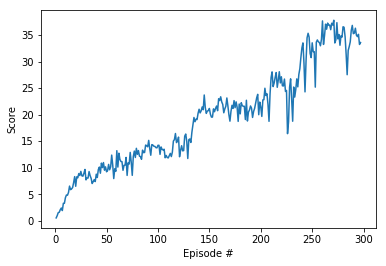

In [4]:
import numpy as np
from collections import deque
import torch
import matplotlib.pyplot as plt
%matplotlib inline

def ddpg(n_episodes=1000, max_t=2000):
    avg_scores_deque = deque(maxlen=100)
    avg_scores = []
    max_avg_score = -np.Inf
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        scores = np.zeros(num_agents)
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations         
            rewards = np.array(env_info.rewards)    
            dones = env_info.local_done      
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            scores += rewards
            if np.any(dones):
                break 
        avg_score = scores.mean()
        avg_scores_deque.append(avg_score)
        avg_scores.append(avg_score)
        print('\rEpisode {}\tCumulative Average Score: {:.2f}\tScore: {:.2f}'\
              .format(i_episode, np.mean(avg_scores_deque), avg_score), end="")
        
        if i_episode % 10 == 0:
            print('\rEpisode {}\tCumulative Average Score: {:.2f}'.format(i_episode, np.mean(avg_scores_deque)))   
        
        if np.mean(avg_scores_deque) >= 30.0:
            torch.save(agent.actor_local.state_dict(), 'solution_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'solution_critic.pth')
            print('\rEnvironment solved in {} episodes\tCumulative Average Score: {:.2f}'\
                  .format(i_episode, np.mean(avg_scores_deque)))
            break
            
    return avg_scores

avg_scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(avg_scores)+1), avg_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()